In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.graphics.gofplots import qqplot

# Carregar datasets
saneamento = pd.read_csv("Documents/dataset_saneamento_distrito.csv")
dengue = pd.read_csv("Documents/dataset_dengue_pop_distrito.csv")

In [2]:
# Conferir colunas disponíveis
print(saneamento.columns)
print(dengue.columns)

Index(['CD_Distrito', 'Nome', 'V00001', 'V00002', 'V00003', 'V00004', 'V00005',
       'V00006', 'V00007', 'V00047',
       ...
       'V00617', 'V00636', 'V00637', 'V00638', 'V00639', 'Regioes',
       'Codigo_subprefeitura', 'Subprefeituras', 'Area_ha', 'Area_km'],
      dtype='object', length=106)
Index(['CRS', 'UVIS', 'DA', 'N', 'INC', 'CD_Distrito', 'População'], dtype='object')


In [3]:
# Fazer o merge (união) dos dados
dados_pop = pd.merge(dengue, saneamento, on="CD_Distrito", how="inner")

dados_pop.head()

,CRS,UVIS,DA,N,INC,CD_Distrito,População,Nome,V00001,V00002,...,V00617,V00636,V00637,V00638,V00639,Regioes,Codigo_subprefeitura,Subprefeituras,Area_ha,Area_km
0,SUDESTE,Mooca/Aricanduva,AGUA RASA,131,"159,80",355030801,85788,Água Rasa,35192,47,...,8,98,20,7,3,Leste,25,Mooca,"717,72","7,18"
1,OESTE,Lapa/ Pinheiros,ALTO DE PINHEIROS,112,"276,90",355030802,37359,Alto de Pinheiros,15778,0,...,0,58,3,4,0,Oeste,11,Pinheiros,"746,14","7,46"
2,NORTE,Perus,ANHANGUERA,129,"147,70",355030803,75360,Anhanguera,26349,0,...,26,245,1900,34,333,Norte,1,Perus,"3324,5","33,24"
3,SUDESTE,Mooca/Aricanduva,ARICANDUVA,68,"79,40",355030804,89574,Aricanduva,32164,115,...,10,32,55,3,6,Leste,26,Aricanduva/Formosa/Carrão,"695,98","6,96"
4,SUDESTE,Penha,ARTUR ALVIM,97,"97,40",355030805,95575,Artur Alvim,35842,8,...,8,103,4,13,0,Leste,21,Penha,"650,58","6,51"


In [4]:
# Descrição do novo conjunto de dados
dados_pop.describe()

,N,CD_Distrito,População,V00001,V00002,V00003,V00004,V00005,V00006,V00007,...,V00613,V00614,V00615,V00616,V00617,V00636,V00637,V00638,V00639,Codigo_subprefeitura
count,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,124.166667,3.550308e+08,119291.656250,44867.802083,67.677083,249.843750,44867.802083,118688.239583,191.5625,286.281250,...,9616.614583,21.166667,1.572917,241.937500,80.802083,400.375000,675.375000,54.635417,116.531250,15.458333
std,84.829571,2.785678e+01,69609.121956,24117.114577,151.858001,252.831058,24117.114577,69665.260983,383.1807,290.693208,...,8900.668910,59.696719,3.988786,539.571834,156.019406,585.831757,1758.280549,91.676562,275.303391,8.712866
min,1.000000,3.550308e+08,11451.000000,3990.000000,0.000000,0.000000,3990.000000,11392.000000,0.0000,0.000000,...,157.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,69.500000,3.550308e+08,75489.750000,30469.000000,3.000000,77.750000,30469.000000,75132.000000,20.7500,79.500000,...,3374.000000,0.000000,0.000000,8.500000,7.000000,58.750000,6.750000,0.000000,0.000000,8.750000
50%,99.000000,3.550308e+08,103611.500000,40368.500000,14.500000,151.000000,40368.500000,103052.500000,53.5000,163.000000,...,5593.000000,0.000000,0.000000,35.500000,25.500000,173.500000,45.000000,13.000000,4.500000,14.000000
75%,152.250000,3.550309e+08,144560.750000,52393.000000,56.000000,358.750000,52393.000000,143636.750000,168.7500,388.750000,...,12520.250000,9.000000,3.000000,208.000000,86.250000,475.750000,329.750000,54.000000,49.500000,23.250000
max,399.000000,3.550309e+08,384873.000000,133257.000000,1186.000000,1315.000000,133257.000000,384159.000000,2874.0000,1361.000000,...,37865.000000,395.000000,34.000000,4342.000000,952.000000,3289.000000,12758.000000,428.000000,1915.000000,32.000000


In [5]:
# Remover colunas constantes
dados_pop = dados_pop.loc[:, dados_pop.nunique() > 1]

# Criação do coeficiente de incidência de dengue (dividindo o total de casos autóctones de dengue no município
# por sua população)
dados_pop['Incidência de Dengue'] = dados_pop['N'] / dados_pop['População']
alvo = "Incidência de Dengue"

# Conferir o resultado
dados_pop[['Incidência de Dengue'] + ['INC']].head()

,Incidência de Dengue,INC
0,0.001527,"159,80"
1,0.002998,"276,90"
2,0.001712,"147,70"
3,0.000759,"79,40"
4,0.001015,"97,40"


In [6]:
# Variáveis de saneamento - Domicílios com determinadas características com relação a água, lixo e esgoto
cols_saneamento = [col for col in dados_pop.columns if col.startswith('V00')]
# Criar novas colunas com os índices (divisão pelo total de domicílios)
for col in cols_saneamento:
    dados_pop[f'{col}_idx'] = dados_pop[col] / dados_pop['V00004']
    
# Selecionar as colunas indexadas para análise
cols_saneamento_idx = [f'{col}_idx' for col in cols_saneamento]

cols_s = cols_saneamento + cols_saneamento_idx

In [7]:
# Verificar dados ausentes
print("Dados ausentes nas variáveis de saneamento e alvo:")
print(dados_pop[cols_s + ['Incidência de Dengue']].isna().sum())

Dados ausentes nas variáveis de saneamento e alvo:
V00001                  0
V00002                  0
V00003                  0
V00004                  0
V00005                  0
                       ..
V00636_idx              0
V00637_idx              0
V00638_idx              0
V00639_idx              0
Incidência de Dengue    0
Length: 189, dtype: int64


In [8]:
# Criar um StandardScaler para as variáveis independentes
scaler_X = StandardScaler()
# Normalizar as variáveis de saneamento (índices)
dados_pop[cols_saneamento_idx] = scaler_X.fit_transform(dados_pop[cols_saneamento_idx])

In [9]:
# Normalizar as variáveis de saneamento (todas)
dados_pop[cols_s] = scaler_X.fit_transform(dados_pop[cols_s])

In [10]:
# Verificar os dados normalizados
print("\nEstatísticas após normalização (média ~ 0, desvio padrão ~ 1):")
print(dados_pop[cols_s].describe())


Estatísticas após normalização (média ~ 0, desvio padrão ~ 1):
             V00001        V00002        V00003        V00004        V00005  \
count  9.600000e+01  9.600000e+01  9.600000e+01  9.600000e+01  9.600000e+01   
mean  -1.295260e-16  5.088522e-17 -9.251859e-18 -1.295260e-16  8.326673e-17   
std    1.005249e+00  1.005249e+00  1.005249e+00  1.005249e+00  1.005249e+00   
min   -1.703868e+00 -4.479997e-01 -9.933719e-01 -1.703868e+00 -1.548253e+00   
25%   -6.001708e-01 -4.281407e-01 -6.842400e-01 -6.001708e-01 -6.285038e-01   
50%   -1.875399e-01 -3.520146e-01 -3.930001e-01 -1.875399e-01 -2.256192e-01   
75%    3.136652e-01 -7.729840e-02  4.330083e-01  3.136652e-01  3.599997e-01   
max    3.684238e+00  7.402925e+00  4.235032e+00  3.684238e+00  3.830666e+00   

             V00006        V00007     V00047        V00048        V00049  ...  \
count  9.600000e+01  9.600000e+01  96.000000  9.600000e+01  9.600000e+01  ...   
mean  -1.387779e-17 -2.081668e-17   0.000000 -6.476301e-17  7.

In [11]:
# 1. Correlação
# Calcular a matriz de correlação
correlacao = dados_pop[cols_s + ['Incidência de Dengue']].corr()
correlacao_dengue = correlacao['Incidência de Dengue'].dropna().sort_values(ascending=False)

print("\nCorrelação com Incidência de Dengue:")
print(correlacao_dengue)


Correlação com Incidência de Dengue:
Incidência de Dengue    1.000000
V00309_idx              0.277197
V00139_idx              0.224130
V00111_idx              0.221658
V00199_idx              0.218255
                          ...   
V00464                 -0.278850
V00467_idx             -0.280653
V00513_idx             -0.294079
V00541_idx             -0.297850
V00200_idx             -0.307039
Name: Incidência de Dengue, Length: 187, dtype: float64


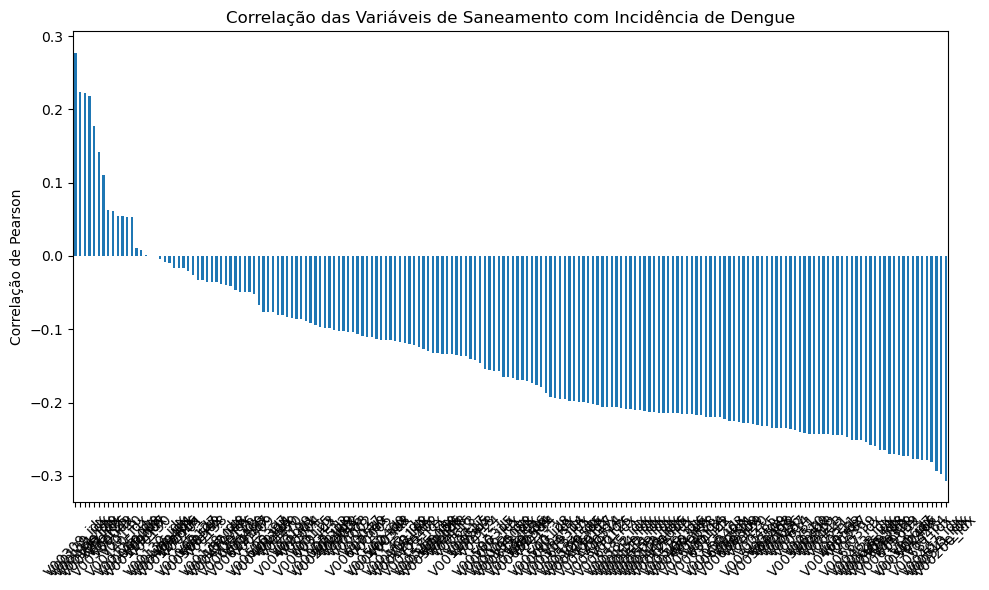

In [12]:
# Visualizar as correlações mais fortes (excluindo a própria variável alvo)
plt.figure(figsize=(10, 6))
correlacao_dengue.drop('Incidência de Dengue').plot(kind='bar')
plt.title('Correlação das Variáveis de Saneamento com Incidência de Dengue')
plt.ylabel('Correlação de Pearson')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# 2. Regressão Simples
print("\nResultados da Regressão Simples para cada variável de saneamento:")
for var in cols_s:
    # Preparar dados para regressão simples
    X_simples = dados_pop[[var]]
    y = dados_pop['Incidência de Dengue']

    # Ajustar modelo de regressão simples
    modelo_simples = LinearRegression()
    modelo_simples.fit(X_simples, y)
    y_pred_simples = modelo_simples.predict(X_simples)

    # Calcular R²
    r2_simples = r2_score(y, y_pred_simples)

    # Exibir resultado no formato solicitado
    print(f"{var}: {r2_simples:.4f}")


Resultados da Regressão Simples para cada variável de saneamento:
V00001: 0.0073
V00002: 0.0107
V00003: 0.0001
V00004: 0.0073
V00005: 0.0124
V00006: 0.0106
V00007: 0.0000
V00047: 0.0118
V00048: 0.0016
V00049: 0.0038
V00050: 0.0175
V00052: 0.0279
V00111: 0.0060
V00112: 0.0550
V00113: 0.0590
V00114: 0.0484
V00115: 0.0085
V00116: 0.0180
V00117: 0.0410
V00118: 0.0180
V00119: 0.0103
V00120: 0.0523
V00121: 0.0589
V00122: 0.0484
V00123: 0.0088
V00124: 0.0215
V00125: 0.0425
V00126: 0.0180
V00127: 0.0011
V00128: 0.0370
V00129: 0.0521
V00130: 0.0000
V00134: 0.0309
V00135: 0.0039
V00136: 0.0021
V00137: 0.0024
V00138: 0.0012
V00139: 0.0200
V00140: 0.0030
V00142: 0.0145
V00199: 0.0072
V00200: 0.0589
V00201: 0.0003
V00309: 0.0027
V00310: 0.0516
V00311: 0.0596
V00312: 0.0730
V00313: 0.0203
V00314: 0.0380
V00315: 0.0248
V00316: 0.0466
V00397: 0.0059
V00398: 0.0133
V00399: 0.0632
V00400: 0.0130
V00401: 0.0003
V00402: 0.0155
V00463: 0.0498
V00464: 0.0778
V00465: 0.0530
V00466: 0.0767
V00467: 0.0551
V00

In [23]:
# 3. Regressão Múltipla com Seleção de Variáveis
# Definir o número de variáveis a selecionar

N = 20 # para evitar overfitting
print(f"\nNúmero de variáveis selecionadas (N): {N}")
if N >= len(dados_pop):
    print("Aviso: N igual ao número de observações pode causar R² = 1.0 devido a overfitting. Considere reduzir N (ex.: N < 19).")

# Calcular a correlação e selecionar as top N variáveis
corr_series = dados_pop[cols_saneamento_idx + ['Incidência de Dengue']].corr()['Incidência de Dengue'].drop('Incidência de Dengue')
corr_sorted = corr_series.abs().sort_values(ascending=False)
top_vars_corr = corr_sorted.head(N).index.tolist()

# Calcular a correlação e selecionar as top N variáveis
# corr_series = dados_pop[cols_saneamento_idx + ['Incidência de Dengue']].corr()['Incidência de Dengue'].drop('Incidência de Dengue')
# abs_corr_sorted = corr_series.abs().sort_values(ascending=False)
print(f"\nAs variáveis mais correlacionadas (em módulo) com 'Incidência de Dengue' são:")
print(top_vars_corr)


Número de variáveis selecionadas (N): 20

As variáveis mais correlacionadas (em módulo) com 'Incidência de Dengue' são:
['V00200_idx', 'V00541_idx', 'V00513_idx', 'V00467_idx', 'V00581_idx', 'V00309_idx', 'V00582_idx', 'V00311_idx', 'V00615_idx', 'V00310_idx', 'V00465_idx', 'V00636_idx', 'V00128_idx', 'V00463_idx', 'V00587_idx', 'V00468_idx', 'V00316_idx', 'V00583_idx', 'V00312_idx', 'V00638_idx']


In [24]:
# Ajustar modelo de regressão múltipla com as variáveis selecionadas
X_multi = dados_pop[top_vars_corr]
modelo_multi = LinearRegression()
modelo_multi.fit(X_multi, y)
y_pred_multi = modelo_multi.predict(X_multi)

In [25]:
# Calcular R²
r2_multi = r2_score(y, y_pred_multi)
mae = mean_absolute_error(y, y_pred_multi)
rmse = np.sqrt(mean_squared_error(y, y_pred_multi))

print("\nResultados da Regressão Múltipla:")
print(f"R²: {r2_multi:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print("Coeficientes:")
for var, coef in zip(top_vars_corr, modelo_multi.coef_):
    print(f"{var}: {coef:.4f}")
print(f"Intercepto: {modelo_multi.intercept_:.4f}")


Resultados da Regressão Múltipla:
R²: 0.2732
MAE: 0.0003
RMSE: 0.0005
Coeficientes:
V00200_idx: -0.0004
V00541_idx: 0.0005
V00513_idx: -0.0002
V00467_idx: -0.0002
V00581_idx: -0.0002
V00309_idx: -0.0001
V00582_idx: 0.0032
V00311_idx: -0.0033
V00615_idx: -0.0002
V00310_idx: 0.0001
V00465_idx: -0.0002
V00636_idx: -0.0006
V00128_idx: 0.0002
V00463_idx: 0.0003
V00587_idx: 0.0001
V00468_idx: -0.0001
V00316_idx: -0.0001
V00583_idx: -0.0003
V00312_idx: 0.0008
V00638_idx: 0.0002
Intercepto: 0.0011


In [ ]:
# Verificar overfitting comparando R²
if r2_multi >= 0.99:
    print("\nAviso: R² muito alto (próximo de 1.0). Possível overfitting. Considere reduzir o número de variáveis ou coletar mais dados.")

# Salvar o conjunto de dados processado
dados_pop.to_csv('RP2dados_unidos_distrito.csv', index=False)

In [ ]:
import seaborn as sns
import statsmodels.api as sm

In [ ]:
top_n = 10  # número de variáveis a exibir
print(f"\nTop {top_n} variáveis mais correlacionadas positivamente:")
print(correlacao_dengue.head(top_n))

print(f"\nTop {top_n} variáveis mais correlacionadas negativamente:")
print(correlacao_dengue.tail(top_n))

# === Gráfico de barras para as mais e menos correlacionadas ===
corr_a = correlacao_dengue.drop(alvo)
top_pos = corr_a.head(top_n)
top_neg = corr_a.tail(top_n)

# Concatenar para exibir juntas
corr_top = pd.concat([top_pos, top_neg])

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_top.values, y=corr_top.index, palette="coolwarm")
plt.title(f"Top {top_n} correlações positivas e negativas com a incidência de dengue")
plt.xlabel("Correlação de Pearson")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

In [ ]:
top_vars = correlacao_dengue.drop(alvo).head(4).index  # 4 variáveis mais correlacionadas
for var in top_vars:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=dados_pop[var], y=dados_pop[alvo], alpha=0.6)
    plt.title(f"{var} vs Incidência de Dengue")
    plt.xlabel(f"{var}")
    plt.ylabel("Incidência de dengue")
    plt.tight_layout()
    plt.show()

In [ ]:
# === Gráfico Fits Plot (observado vs predito) ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred_multi, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Linha 45° ajustada
plt.xlabel("Incidência de Dengue (real)")
plt.ylabel("Incidência de Dengue (predita)")
plt.title("Fits Plot - Observado vs Predito (Regressão Múltipla)")
plt.tight_layout()
plt.show()

In [ ]:
# === Q-Q Plot dos resíduos ===
residuos_multi = y - y_pred_multi
qqplot(residuos_multi, line='45', fit=True)
plt.title("Q-Q Plot dos Resíduos (Regressão Múltipla)")
plt.tight_layout()
plt.show()

In [ ]:
# === Histograma dos resíduos ===
plt.figure(figsize=(6, 4))
sns.histplot(residuos_multi, kde=True)
plt.title("Distribuição dos Resíduos (Regressão Múltipla)")
plt.xlabel("Resíduo (erro)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()